In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [9]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.columns=["CustomerID",'Gender','Age','Annual Income','Spending Score']

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#drop columns
data.drop(columns=["CustomerID","Gender"],inplace=True,axis=1)
data.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


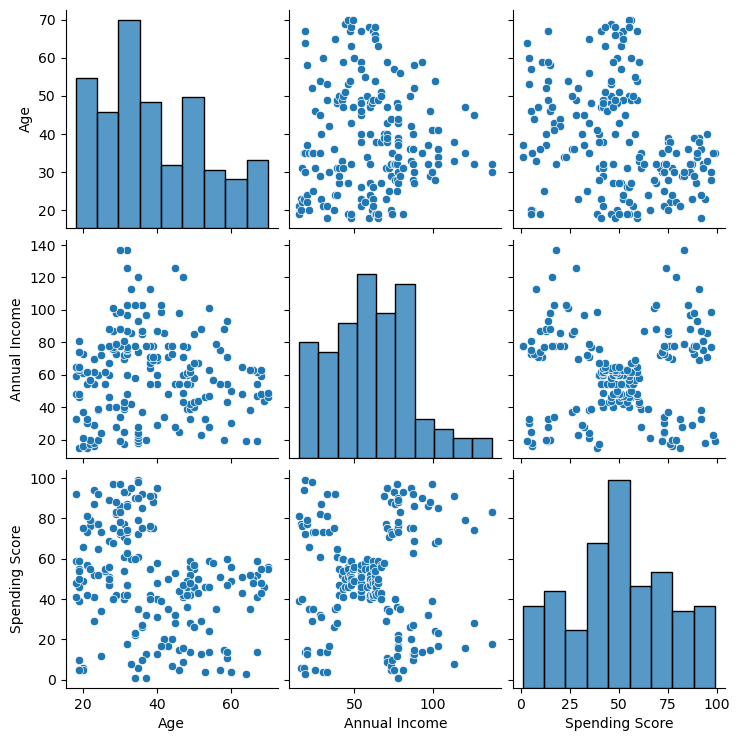

In [16]:
#EDA
sns.pairplot(data)
plt.show()

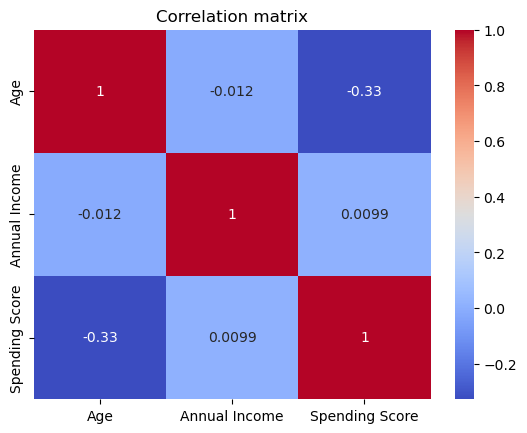

In [22]:
#display correlatiion heatmap
sns.heatmap(data.corr(),cmap="coolwarm",annot=True)
plt.title("Correlation matrix")
plt.show()

In [26]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)
data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

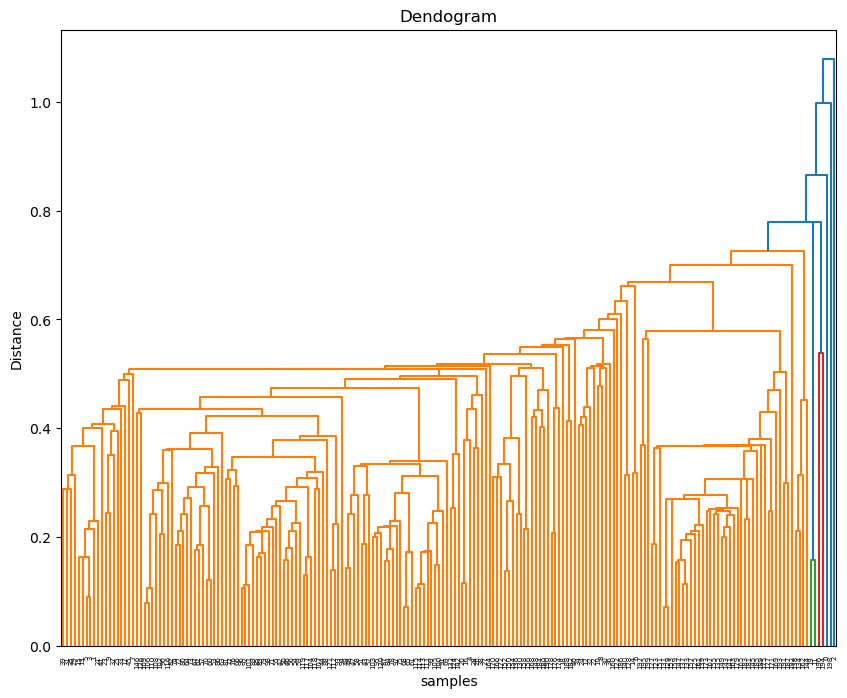

In [29]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(data,method='single')
plt.figure(figsize=(10,8))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel("samples")
plt.ylabel("Distance")
plt.show()
model=AgglomerativeClustering(n_clusters=5,linkage="average")

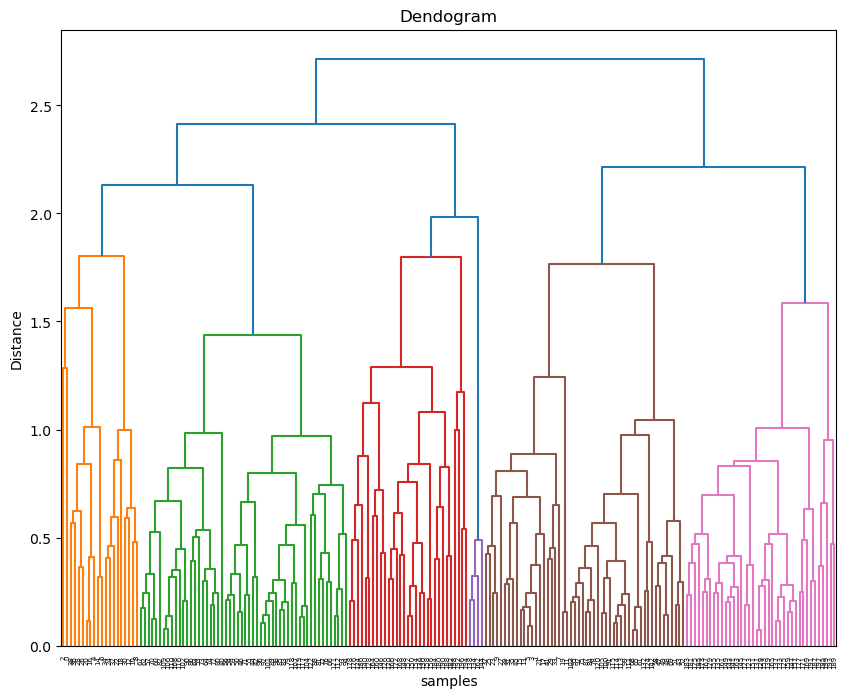

In [30]:
linked=linkage(data,method='average')
plt.figure(figsize=(10,8))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel("samples")
plt.ylabel("Distance")
plt.show()

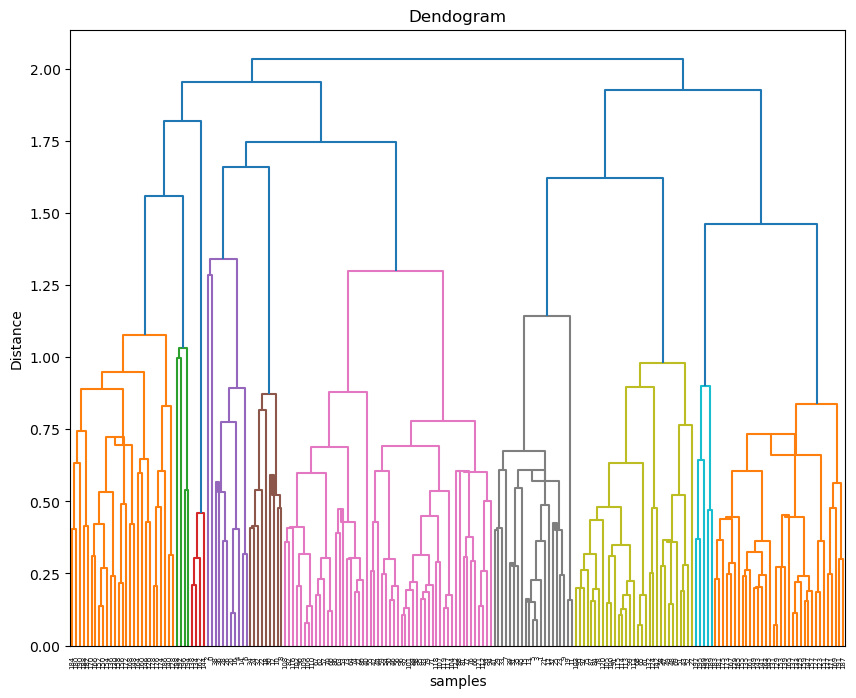

In [31]:
linked=linkage(data,method='centroid')
plt.figure(figsize=(10,8))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel("samples")
plt.ylabel("Distance")
plt.show()

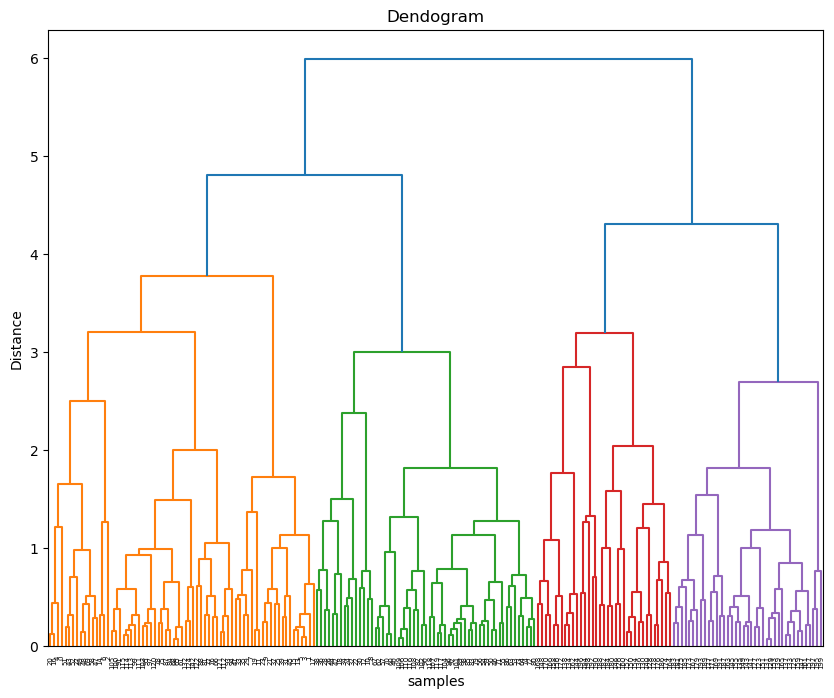

In [32]:
linked=linkage(data,method='complete')
plt.figure(figsize=(10,8))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel("samples")
plt.ylabel("Distance")
plt.show()

In [63]:
#train model
model=AgglomerativeClustering(n_clusters=5,linkage="ward")
cluster=model.fit_predict(data)
labels=model.labels_
print(cluster)
df = pd.DataFrame(data, columns=['Age','Annual Income','Spending Score'])
df['clusters'] = labels
df.head()
df.to_csv("clustered_mall_Customers_.csv",index=False)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 1 0 4 0 4 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 2 0 2 1 2 3 2 3 2 0 2 0 2 3 2 0 2 3 2 0 2 0 2 1 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


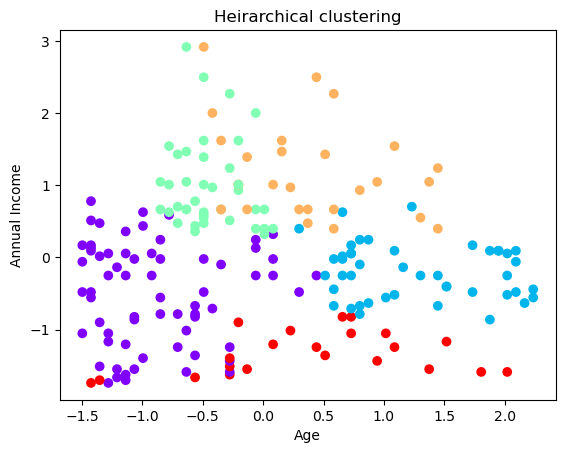

In [64]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap="rainbow")
plt.title("Heirarchical clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

### Plot Dendogram with threshold

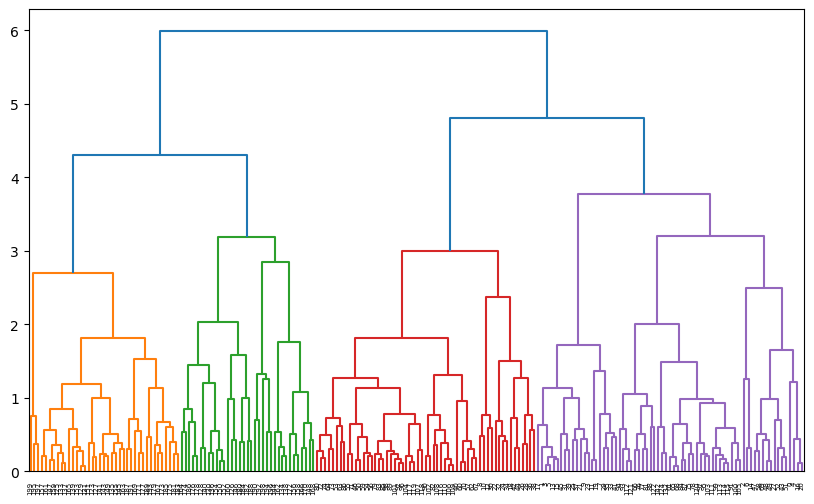

In [65]:
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.axhline(y=150,color='r',linestyle='--')
plt.show()

In [69]:
from scipy.cluster.hierarchy import fcluster

# get clusters for k=5
k = 5
fc = fcluster(linked, t=k, criterion='maxclust')
print('unique clusters (k=5):', np.unique(fc))

# # extract merge distances from linkage and estimate optimal k using largest gap
# distances = linked[:, 2]
# idx = np.argmax(np.diff(distances))
# estimated_k = len(distances) - idx
# print('estimated optimal clusters (gap method):', estimated_k)

fc

unique clusters (k=5): [1 2 3 4 5]


array([5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 5, 4,
       3, 4, 3, 4, 3, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5,
       3, 4, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [81]:

#train model
model=AgglomerativeClustering(n_clusters=5)
model.fit(data)
labels=model.labels_
print(labels)
# save the model
import joblib
joblib.dump(model,'agglomerative_model.pkl')



[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 2 0 2 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 3 0 3 1 3 4 3 4 3 0 3 0 3 4 3 0 3 4 3 0 3 0 3 1 3
 4 3 4 3 4 3 4 3 4 3 4 3 1 3 0 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


['agglomerative_model.pkl']

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
data=pd.read_csv("clustered_mall_Customers_.csv")
data=pd.DataFrame(data)
x=data.drop(columns=["clusters"],axis=1)
y=data["clusters"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
rf=RandomForestClassifier(n_estimators=90,criterion='entropy',max_depth=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))

Accuracy score :  0.95
confusion_matrix : 
 [[14  2  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  3]]


In [78]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
print("Accuracy score : ",accuracy_score(y_test,y_pred1))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred1))

Accuracy score :  0.95
confusion_matrix : 
 [[14  2  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  3]]


In [80]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="gini",max_depth=10)
tree.fit(x_train,y_train)
y_pred2=tree.predict(x_test)
print("Accuracy score : ",accuracy_score(y_test,y_pred2))
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred2))

Accuracy score :  0.925
confusion_matrix : 
 [[14  2  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 1  0  0  9  0]
 [ 0  0  0  0  3]]


In [82]:
# save the model
import joblib
joblib.dump(tree,"tree_model.pkl")

['tree_model.pkl']